Kaggle Link - https://www.kaggle.com/competitions/santander-customer-transaction-prediction

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score,roc_auc_score,roc_curve, auc
import numpy as np
import seaborn as sns
from sklearn import preprocessing, metrics
import lightgbm as lgb
import gc
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
gc.enable()
import matplotlib.pyplot as plt
import datetime
from sklearn import preprocessing
import re
from sklearn.model_selection import StratifiedKFold, KFold
print('Libraries Imported')

Libraries Imported


In [2]:
train = pd.read_csv('../input/train.csv')

In [3]:
test = pd.read_csv('../input/test.csv')

In [4]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
len(test)

200000

Text(0, 0.5, 'count')

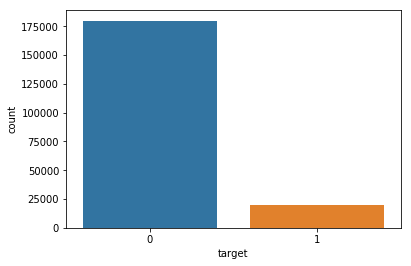

In [6]:
ax = sns.countplot(x='target', data=train)
ax.set_xlabel('target')
ax.set_ylabel("count")  


In [7]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,7.567236,0.394340,-3.245596,14.023978,8.530232,7.537606,14.573126,9.333264,-5.696731,15.244013,12.438567,13.290894,17.257883,4.305430,3.019540,10.584400,13.667496,-4.055133,-1.137908,5.532980,5.053874,-7.687740,10.393046,-0.512886,14.774147,11.434250,3.842499,2.187230,5.868899,10.642131,...,24.259300,5.633293,5.362896,11.002170,-2.871906,19.315753,2.963335,-4.151155,4.937124,5.636008,-0.004962,-0.831777,19.817094,-0.677967,20.210677,11.640613,-2.799585,11.882933,-1.014064,2.591444,-2.741666,10.085518,0.719109,8.769088,12.756676,-3.983261,8.970274,-10.335043,15.377174,0.746072,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,1.235070,5.500793,5.970253,0.190059,4.639536,2.247908,0.411711,2.557421,6.712612,7.851370,7.996694,5.876254,8.196564,2.847958,0.526893,3.777245,0.285535,5.922210,1.523714,0.783367,2.615942,7.965198,2.159891,2.587830,4.322325,0.541614,5.179559,3.119978,2.249730,4.278903,...,10.880263,0.217938,1.419612,5.262056,5.457784,5.024182,0.369684,7.798020,3.105986,0.369437,4.424621,5.378008,8.674171,5.966674,7.136427,2.892167,7.513939,2.628895,8.579810,2.798956,5.261243,1.371862,8.963434,4.474924,9.318280,4.725167,3.189759,11.574708,3.944604,0.976348,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,3.970500,-20.731300,-26.095000,13.434600,-6.011100,1.013300,13.076900,0.635100,-33.380200,-10.664200,-12.402500,-5.432200,-10.089000,-5.322500,1.209800,-0.678400,12.720000,-24.243100,-6.166800,2.089600,-4.787200,-34.798400,2.140600,-8.986100,1.508500,9.816900,-16.513600,-8.095100,-1.183400,-6.337100,...,-7.452200,4.852600,0.623100,-6.531700,-19.997700,3.816700,1.851200,-35.969500,-5.250200,4.258800,-14.506000,-22.479300,-11.453300,-22.748700,-2.995300,3.241500,-29.116500,4.952100,-29.273400,-7.856100,-22.037400,5.416500,-26.001100,-4.808200,-18.489700,-22.583300,-3.022300,-47.753600,4.412300,-2.554300,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.26

In [8]:
# count the number of NaN values in each column
print(train.isnull().sum())

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
          ..
var_170    0
var_171    0
var_172    0
var_173    0
var_174    0
var_175    0
var_176    0
var_177    0
var_178    0
var_179    0
var_180    0
var_181    0
var_182    0
var_183    0
var_184    0
var_185    0
var_186    0
var_187    0
var_188    0
var_189    0
var_190    0
var_191    0
var_192    0
var_193    0
var_194    0
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64


In [9]:
train.shape
len(train.columns)

202

Univariate Analysis

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


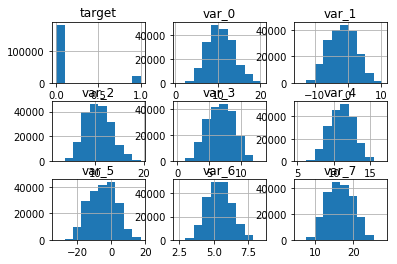

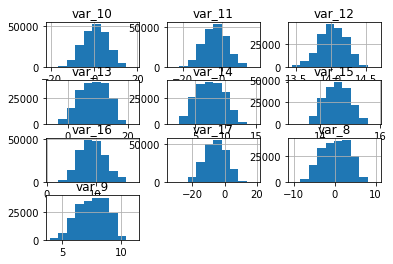

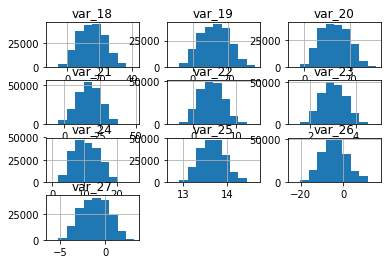

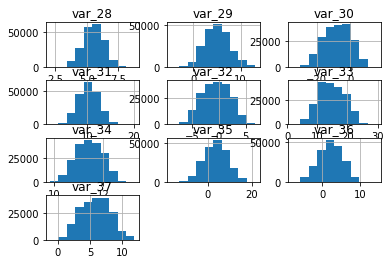

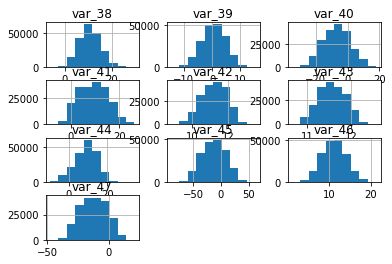

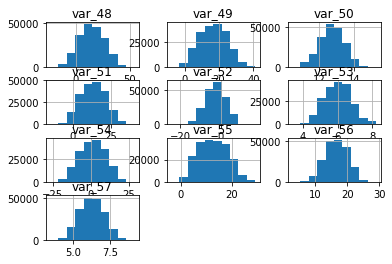

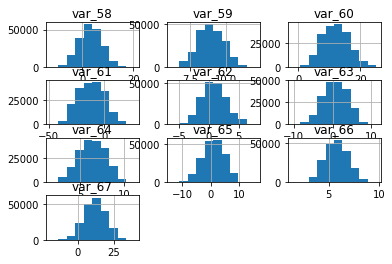

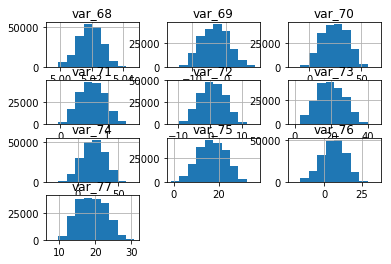

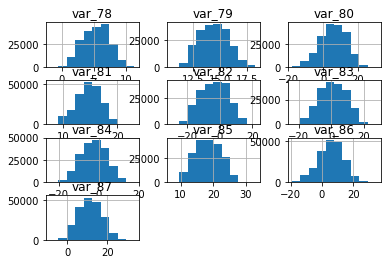

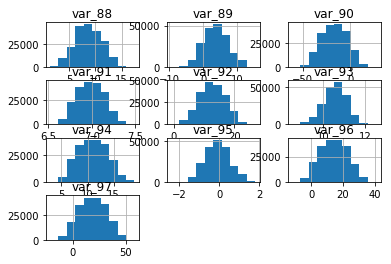

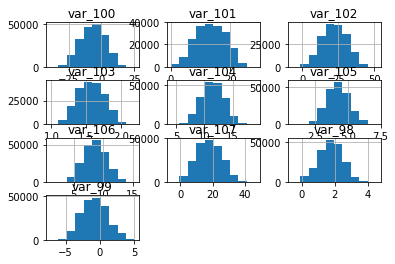

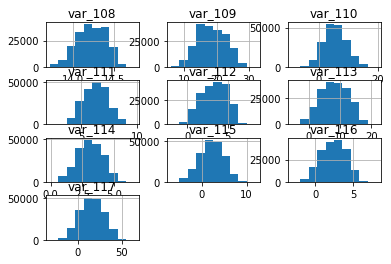

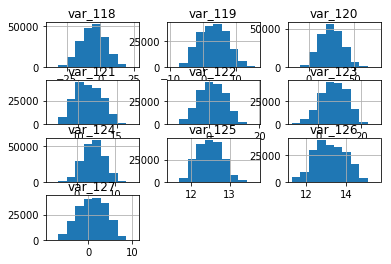

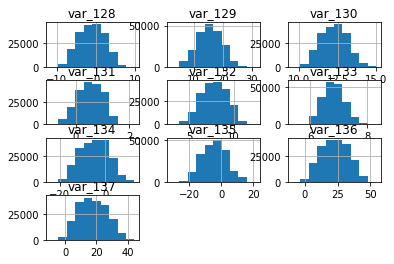

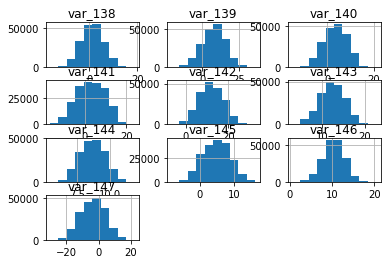

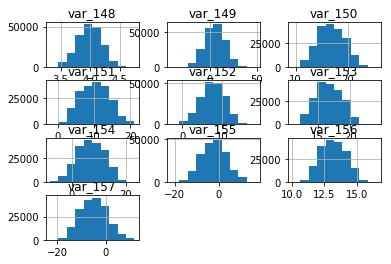

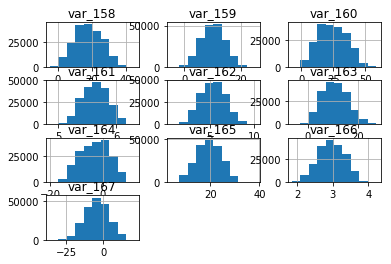

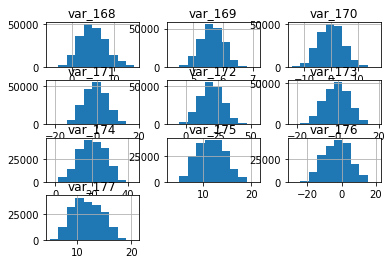

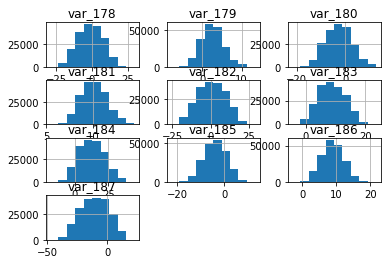

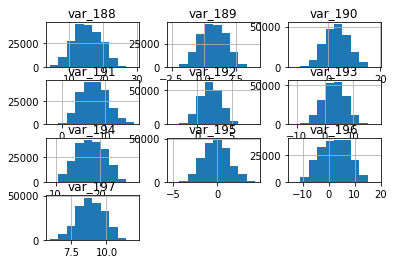

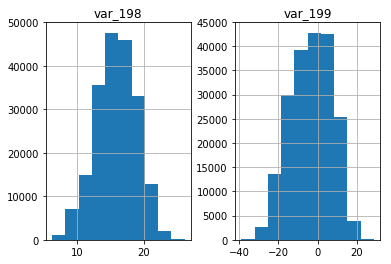

In [10]:
i = 0
while i < len(train.columns):    

    train[train.columns[i:i+10]].hist()

    i += 10

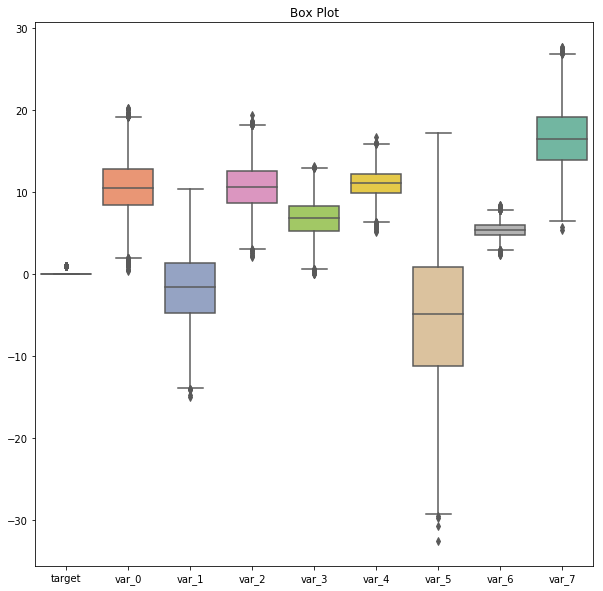

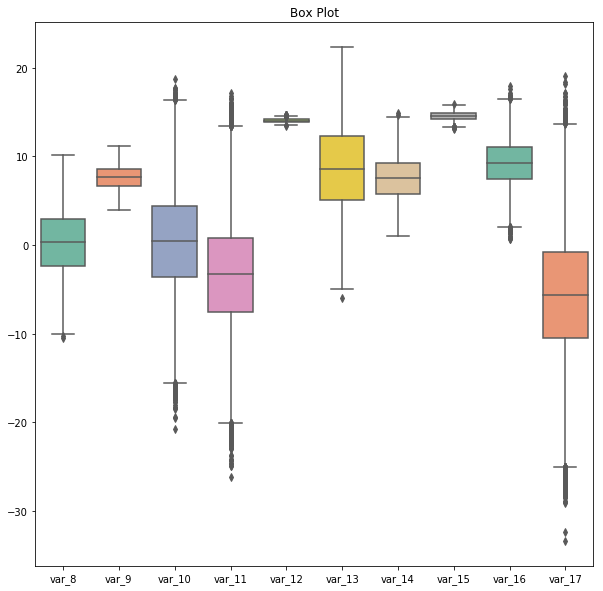

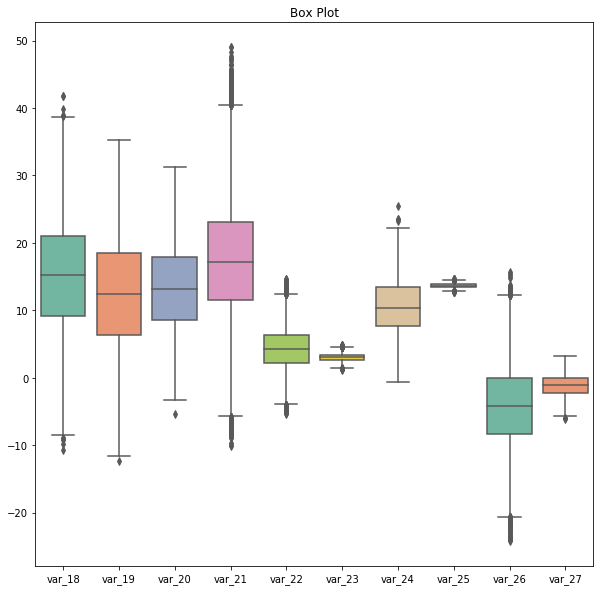

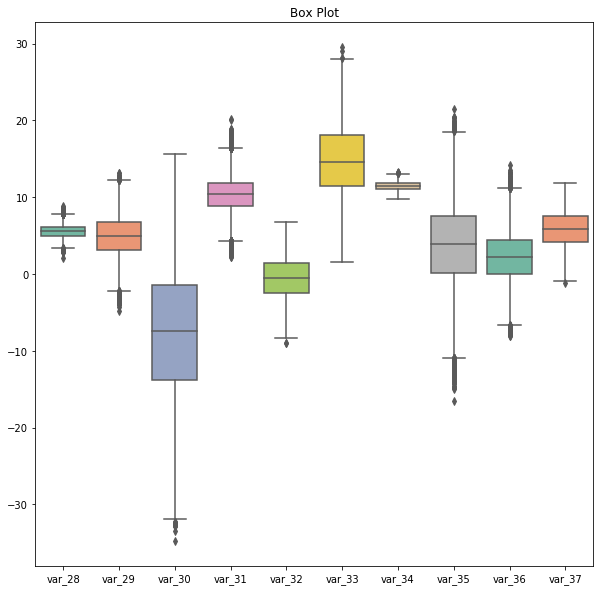

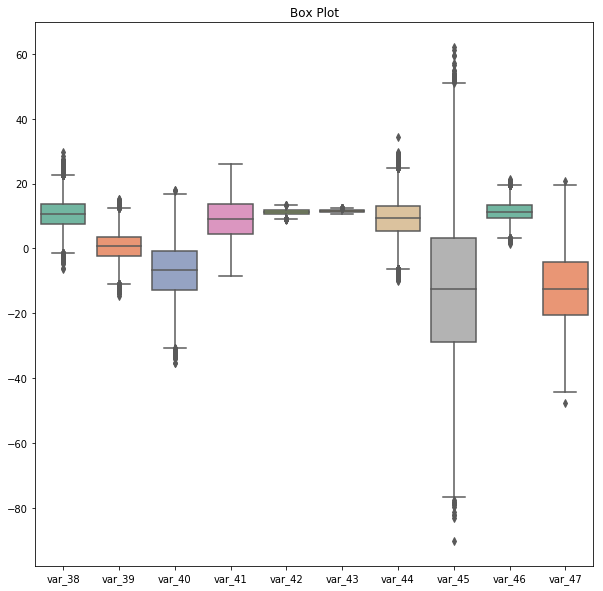

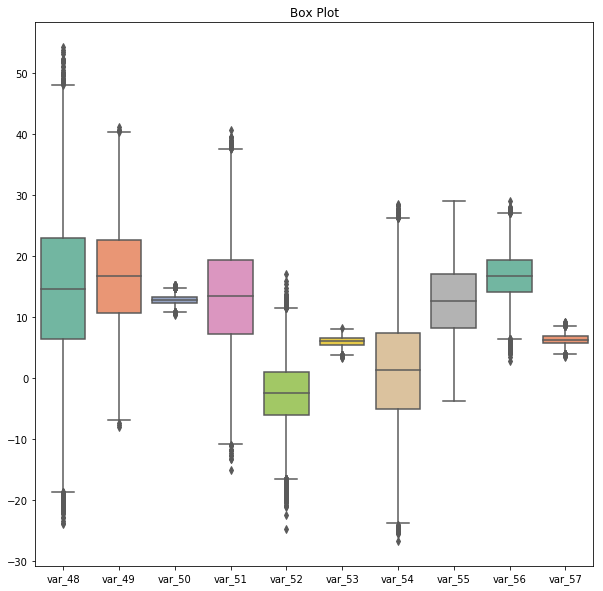

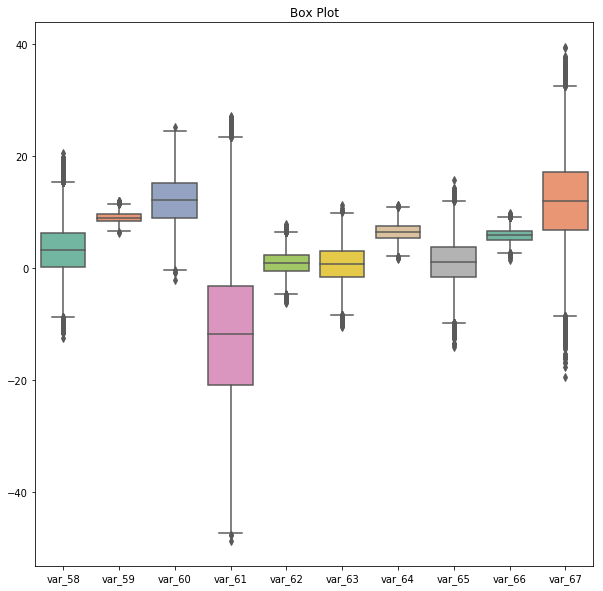

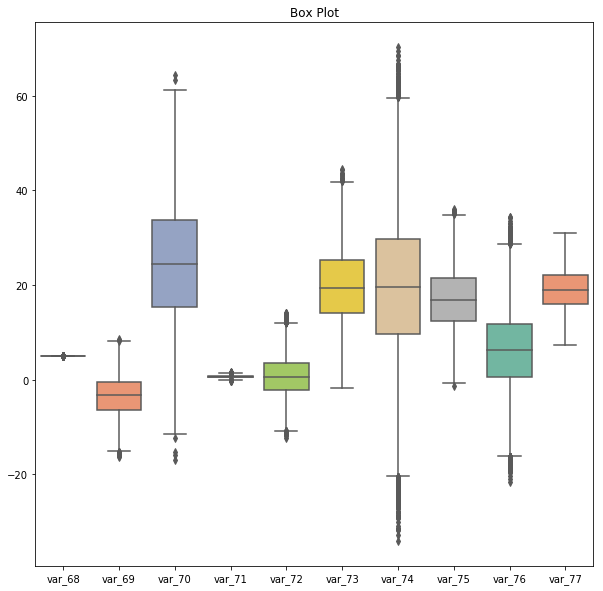

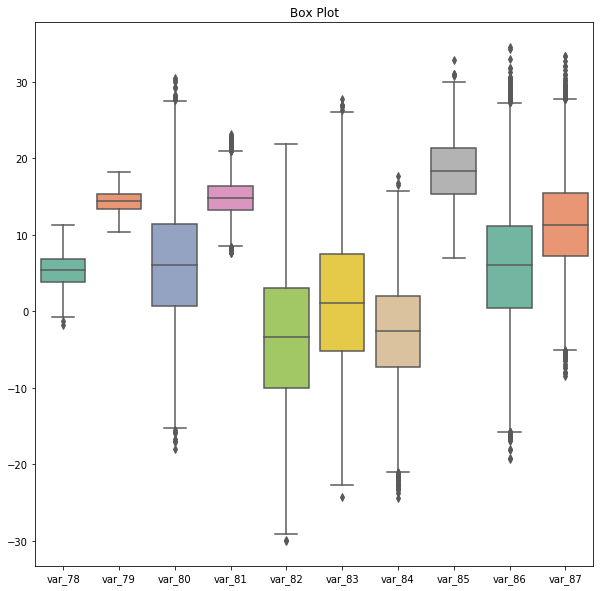

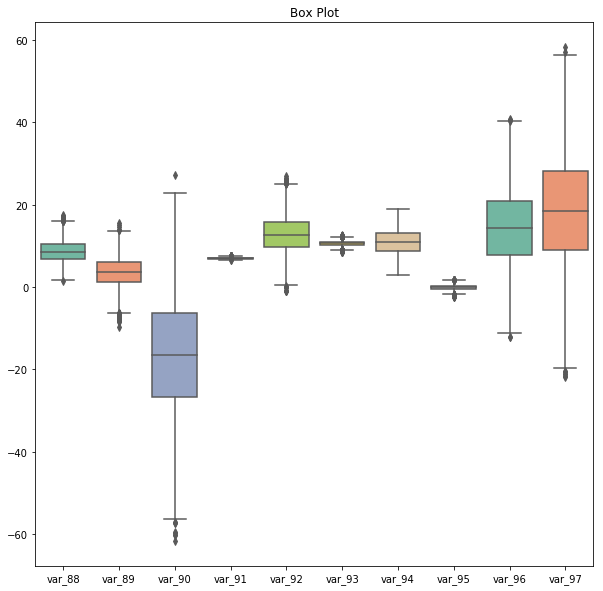

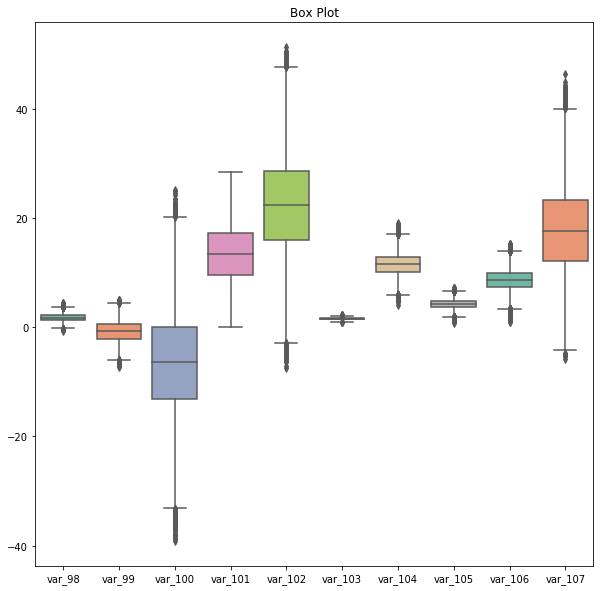

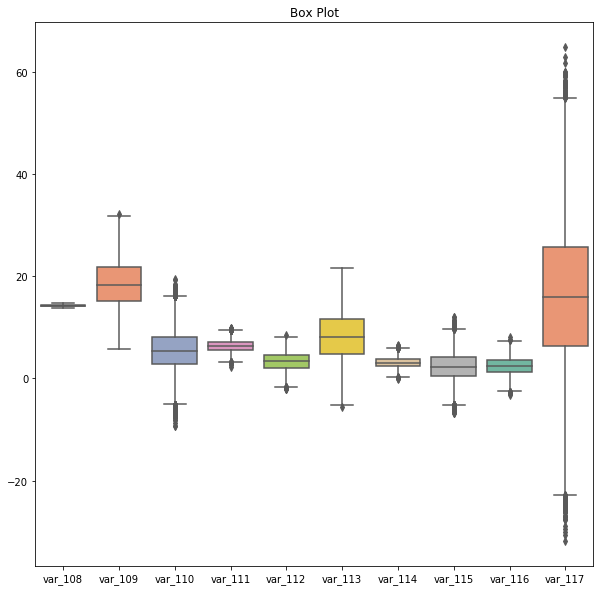

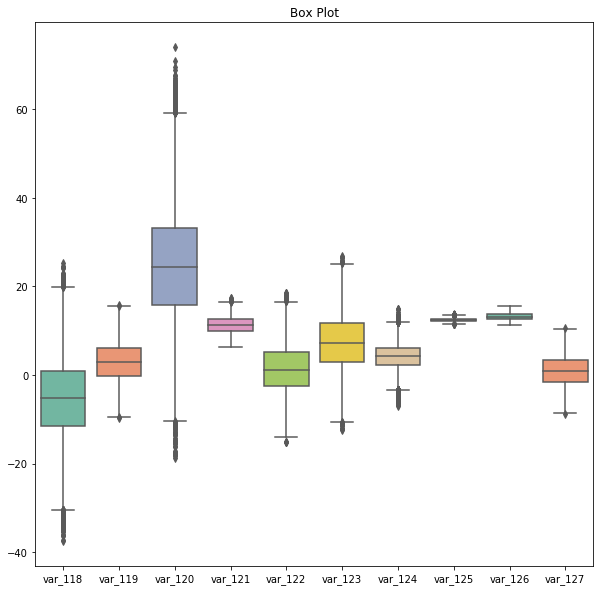

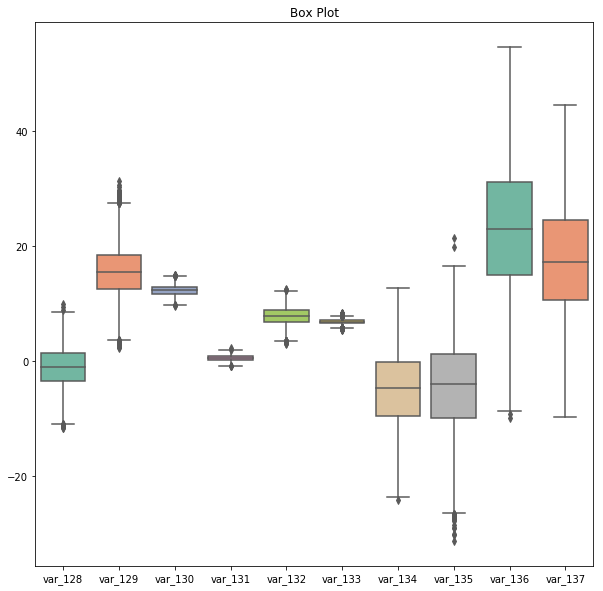

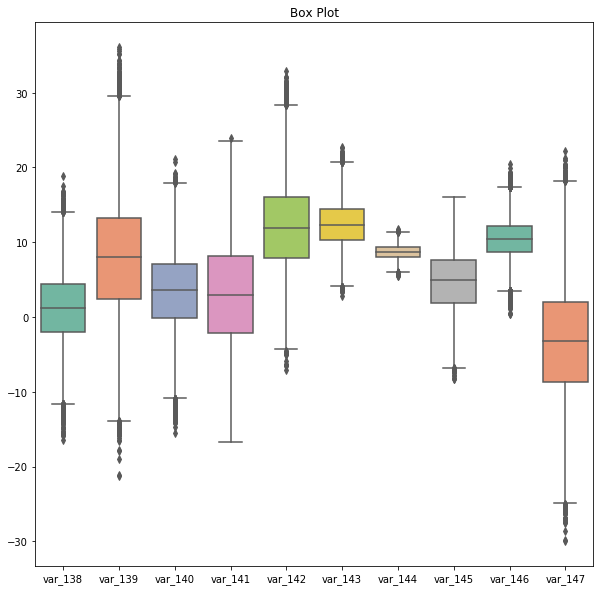

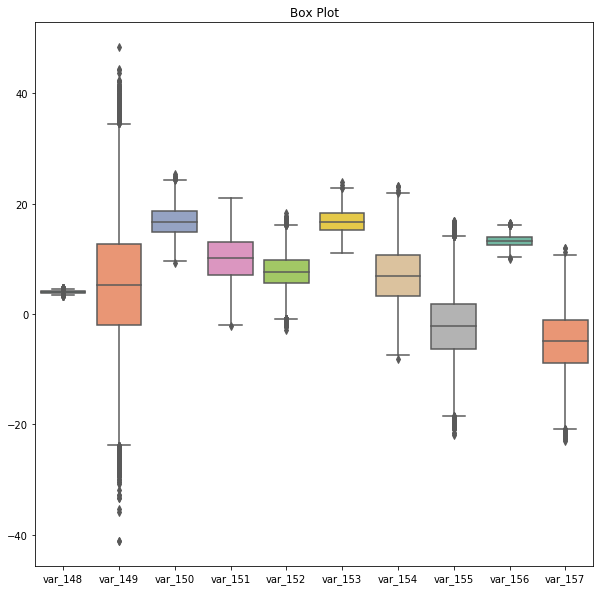

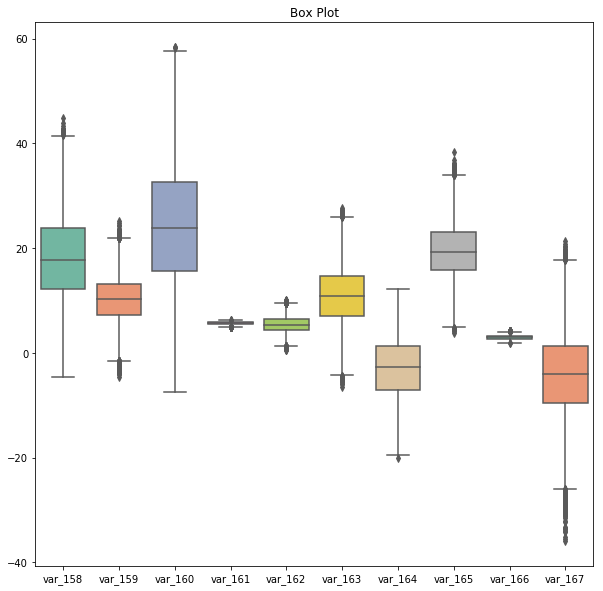

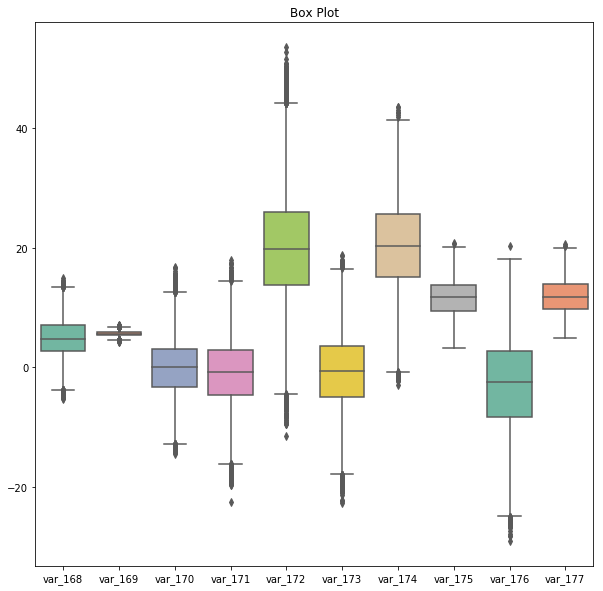

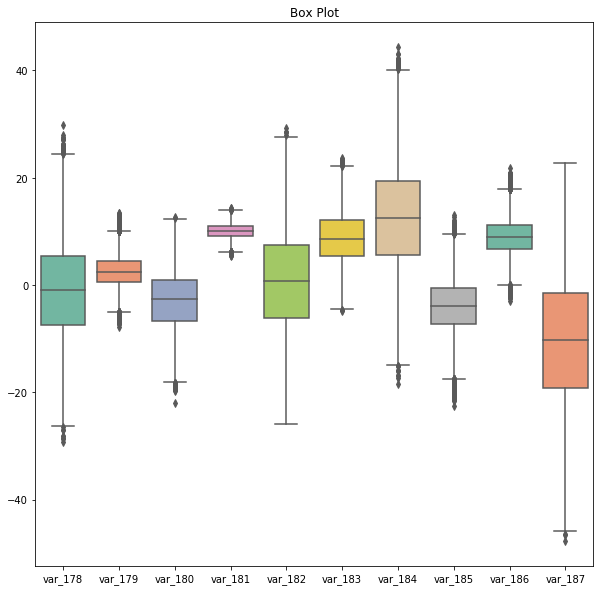

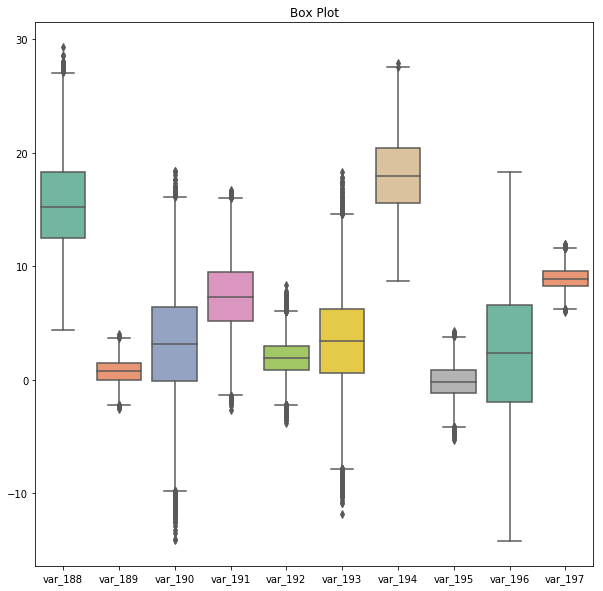

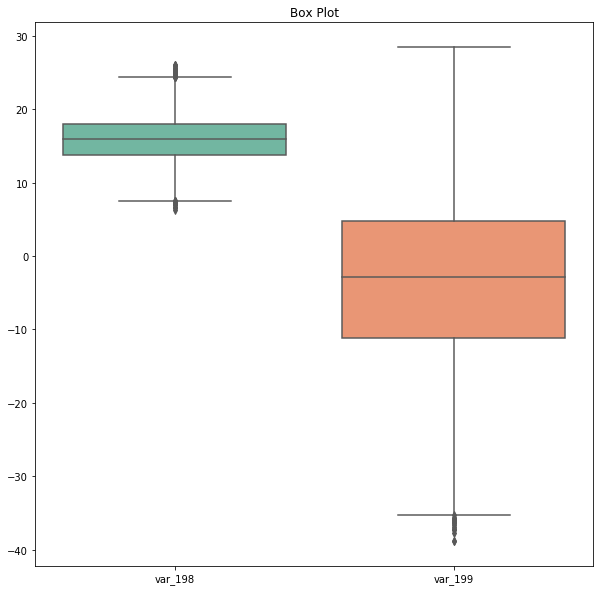

In [11]:
i = 0
while i < len(train.columns):    
    plt.figure(figsize=(10,10))
    ax = sns.boxplot(data=train[train.columns[i:i+10]],  palette="Set2")
    plt.title('Box Plot')
    plt.show()
    i += 10

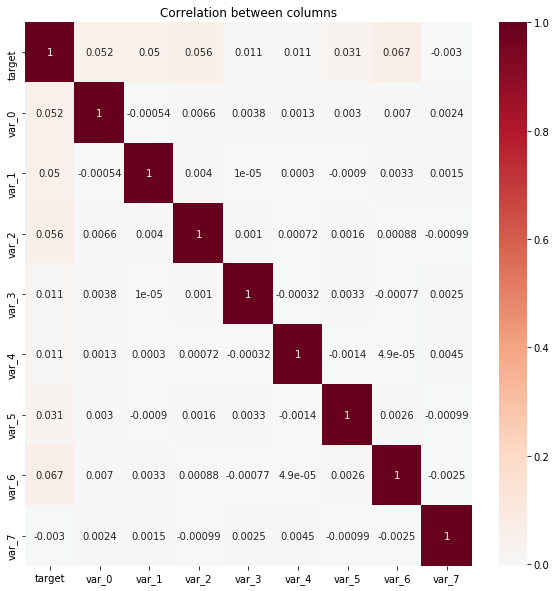

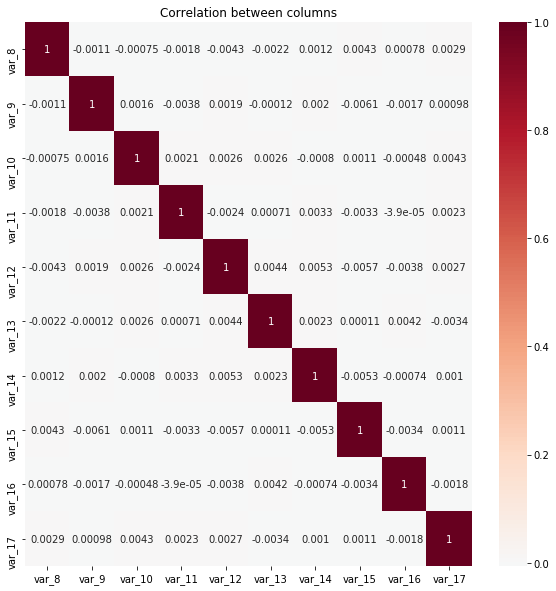

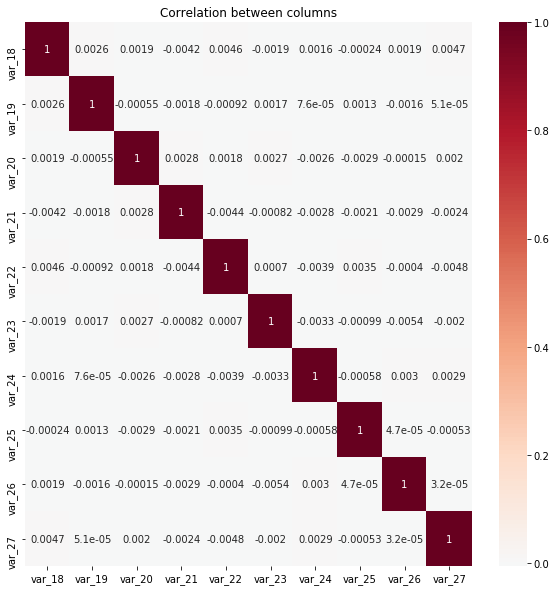

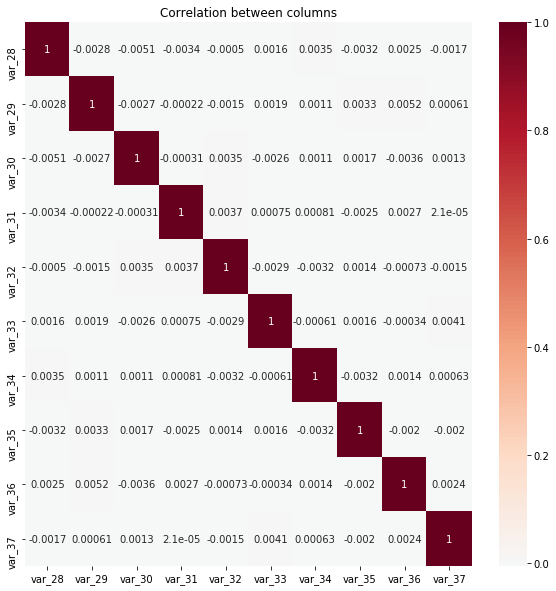

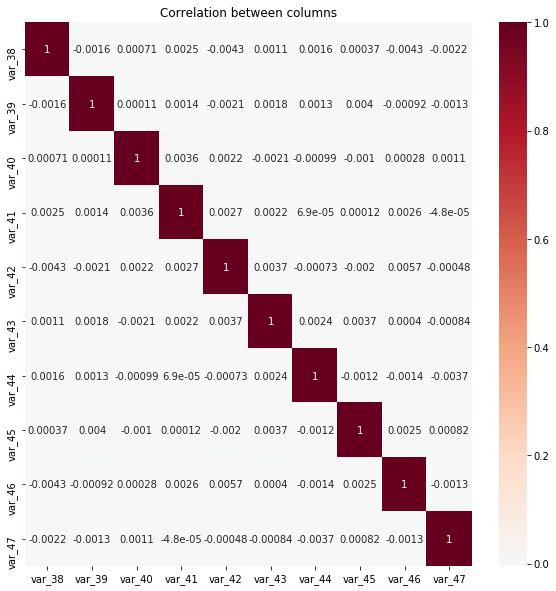

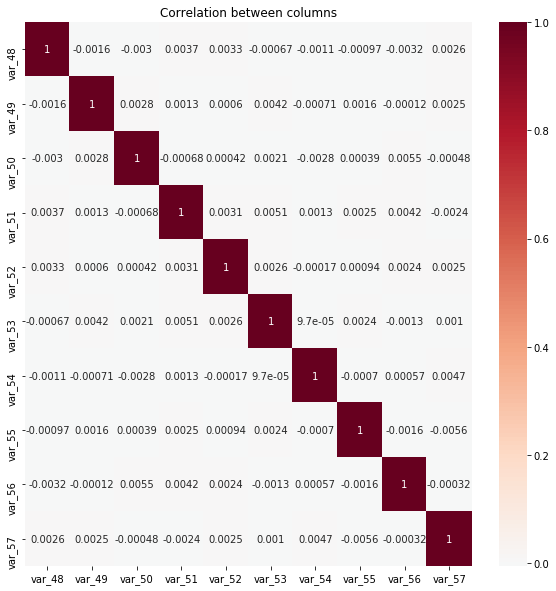

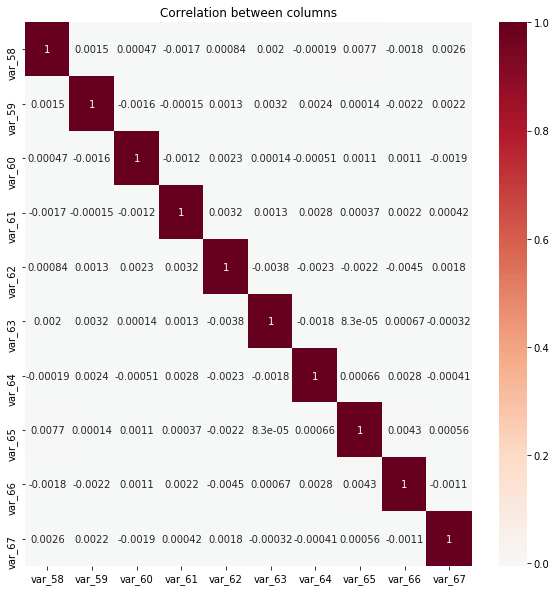

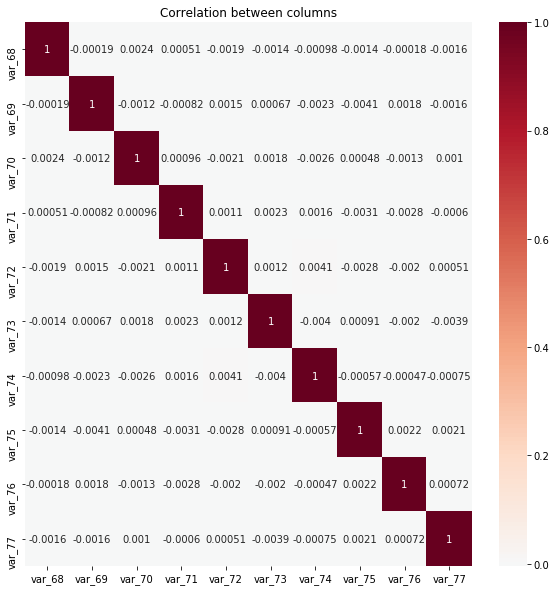

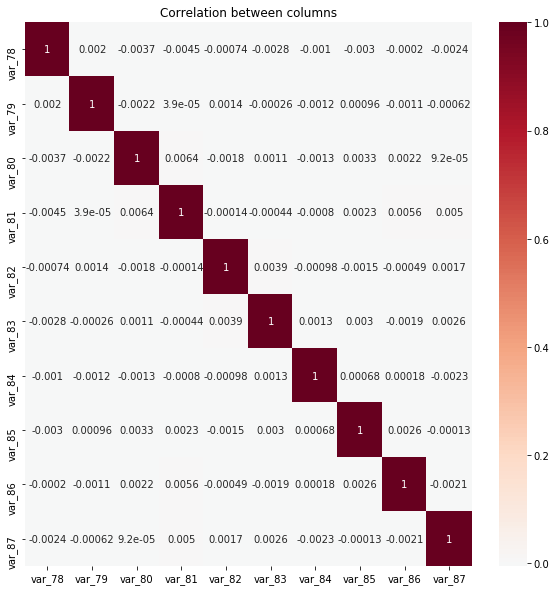

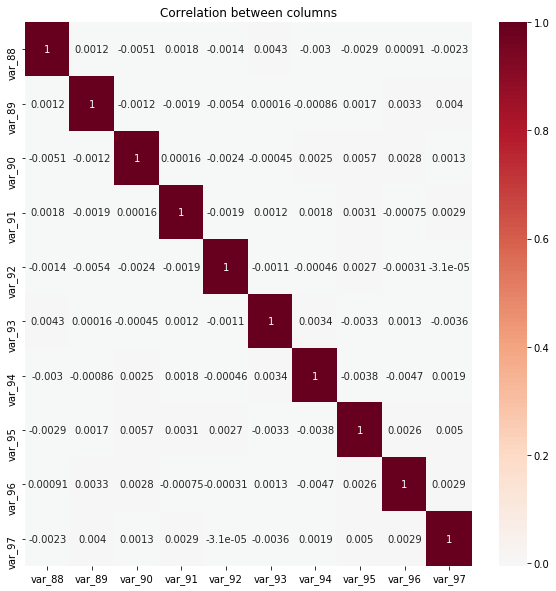

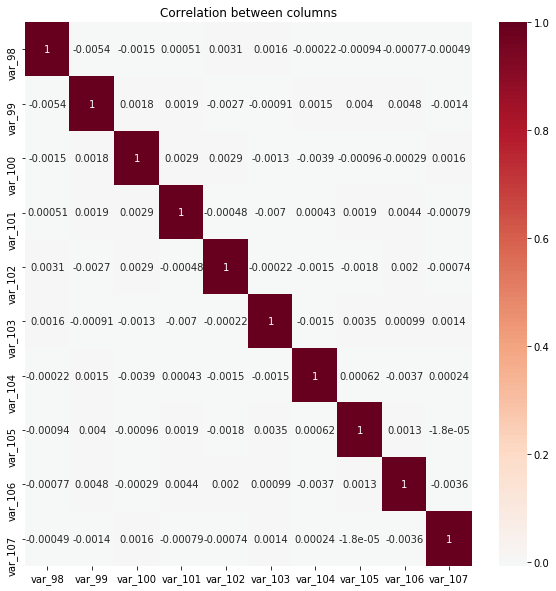

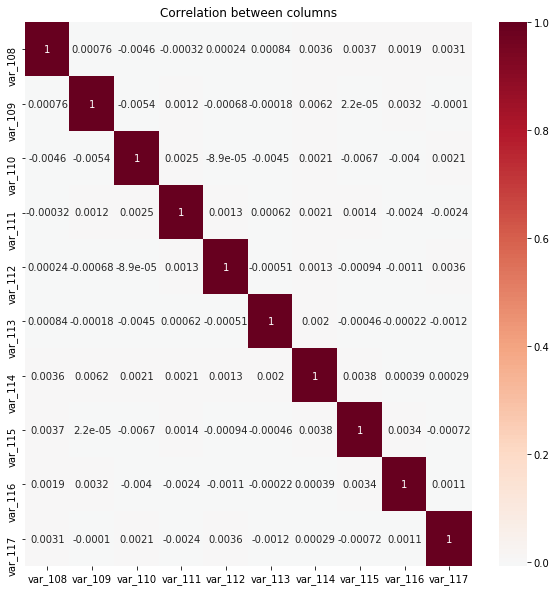

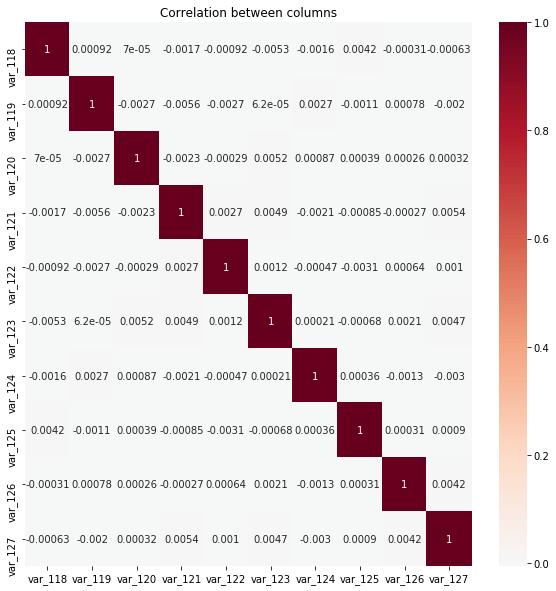

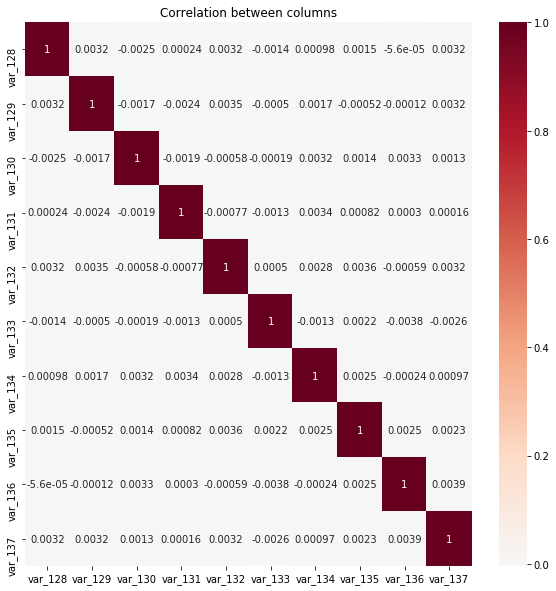

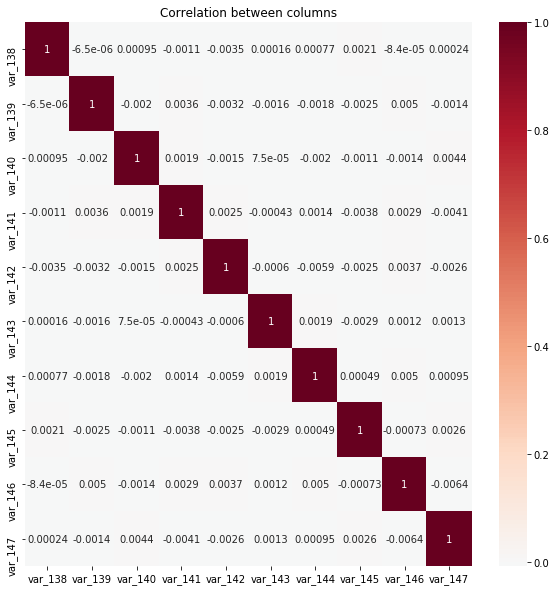

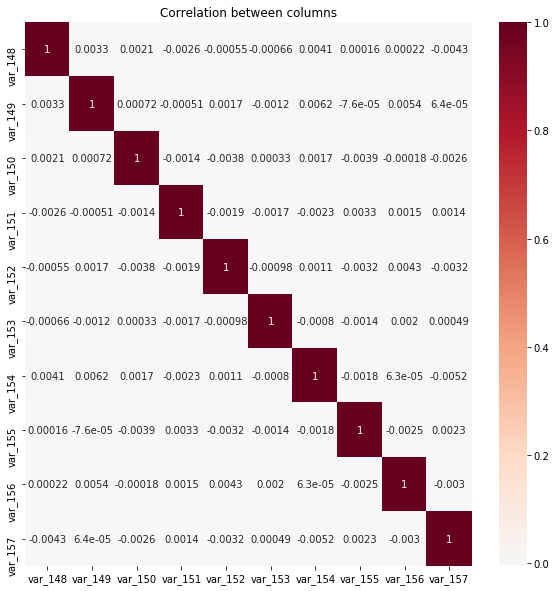

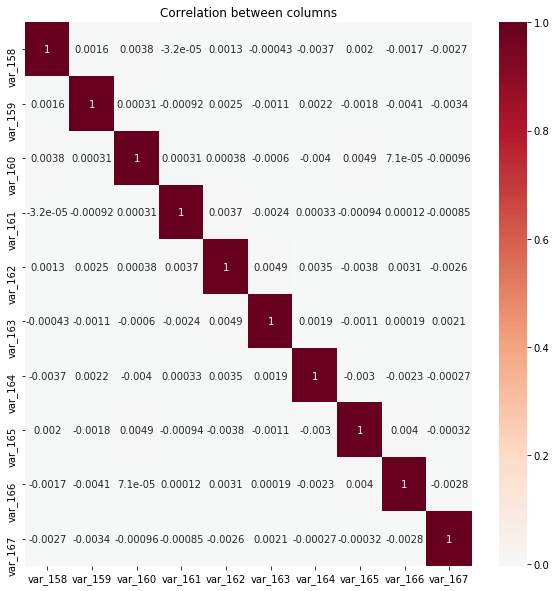

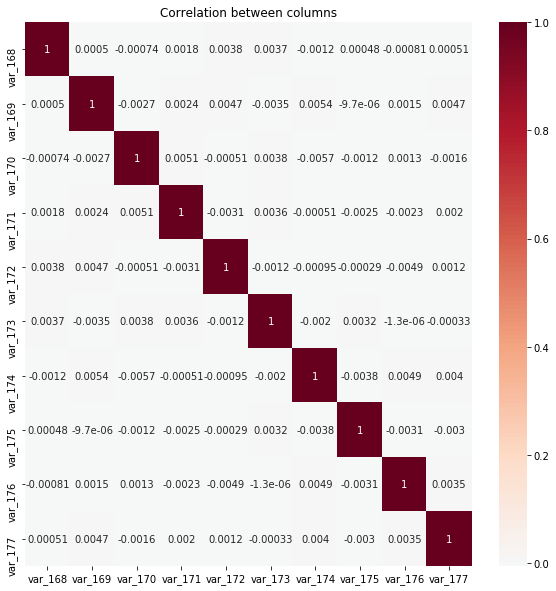

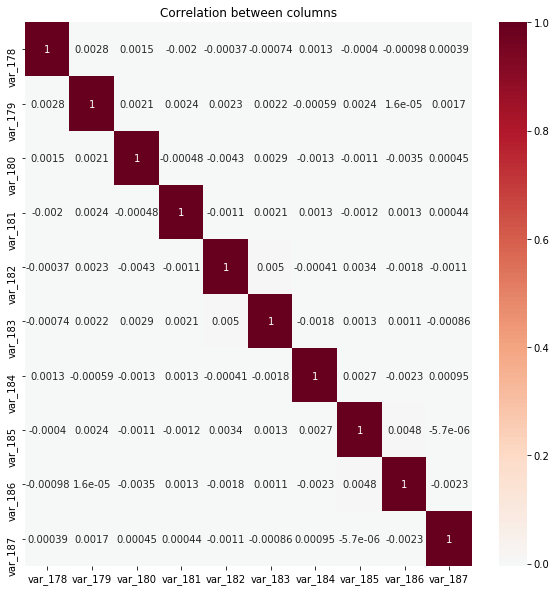

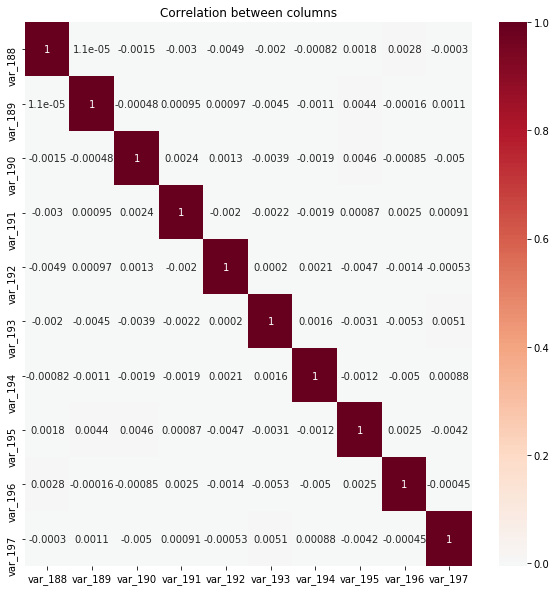

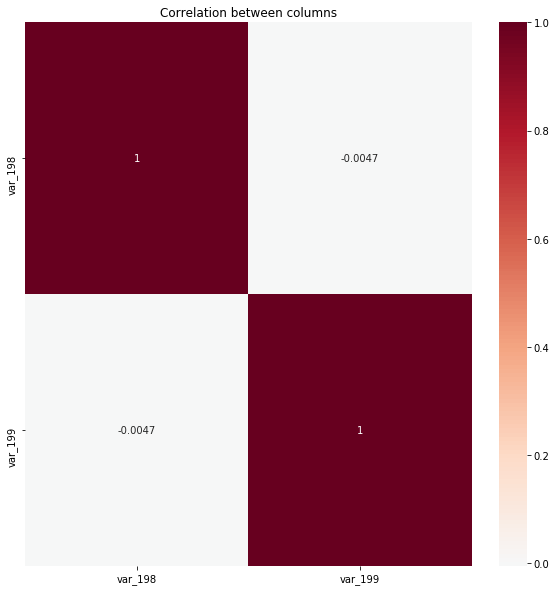

In [12]:
i = 0
while i < len(train.columns):    
    plt.figure(figsize=(10,10))
    sns.heatmap(train[train.columns[i:i+10]].corr(), cmap='RdBu_r', annot=True, center=0.0)
    plt.title('Correlation between columns')
    plt.show()
    i += 10

In [13]:
def run_lgbm(train_X, train_y):
    params = {  
        'num_leaves':30,
            'objective':'binary',
            "metric" : "auc",
            'max_depth':7,
            'learning_rate':.001,
            'max_bin':100,
            "bagging_fraction" : 0.7,
            "feature_fraction" : 0.5,
            "bagging_frequency" : 6,
            "bagging_seed" : 42,
            "verbosity" : 1,
#           "boosting": ['rf'],
           "reg_alpha" : 0,
           'reg_lambda' :10
             }

    lgbm_train = lgb.Dataset(train_X, label=train_y)


    model = lgb.train(params, lgbm_train,num_boost_round=1500)

    print(datetime.datetime.now())
    return model

In [14]:
# #predicting on test set
# model = run_lgbm(train_X,train_y)
# val_y_pred=model.predict(val_X)
# val_y_pred[0:5]  # showing first 5 predictions
# val_y_pred = np.where(val_y_pred > 0.5, 1, 0)

# #Metrics
# get_metrics(val_y,val_y_pred)
# plot_roc_curve(val_y,val_y_pred)
# get_auc_score(val_y ,val_y_pred)

Metrics

In [15]:
      
# Making the Confusion Matrix
def get_metrics(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)

    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')


    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

    # Model Precision: what percentage of positive tuples are labeled as such?
    print("Precision:",metrics.precision_score(y_test, y_pred))

    # Model Recall: what percentage of positive tuples are labelled as such? 
    
    print(" True positive rate or (Recall or Sensitivity) :",metrics.recall_score(y_test, y_pred))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)

    #Specitivity. or True negative rate
    print(" True Negative rate or Specitivity :",specificity)

    false_negative = fn / (fn+tp)

    #False negative rate
    print(" False Negative rate :",false_negative)

    #False positive rate
    print(" False positive rate (Type 1 error) :",1 - specificity)
    print(cm)


def get_auc_score(y_test ,y_pred):
    r_a_score = roc_auc_score(y_test,y_pred)
    print("ROC-AUC-Score:", r_a_score)
    
def plot_roc_curve(y_test,y_pred,label=None):
#     # compute true positive rate and false positive rate
#     false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
#     # plotting them against each other
#     #def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
#     plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
#     plt.plot([0, 1], [0, 1], 'r', linewidth=4)
#     plt.axis([0, 1, 0, 1])
#     plt.xlabel('False Positive Rate (FPR)', fontsize=16)
#     plt.ylabel('True Positive Rate (TPR)', fontsize=16)

#     plt.figure(figsize=(14, 7))
#     plot_roc_curve(false_positive_rate, true_positive_rate)
#     plt.show()

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
def get_accuracy_error(y_test,y_pred,label):
    print(label + " Accuracy:",metrics.accuracy_score(y_test, y_pred))
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    print(label + " Error:", (fp+fn)/(tn+ fp+ fn+ tp) ) 

In [16]:
features = [c for c in train.columns if c not in ['ID_code', 'target']]
target = train['target']


In [17]:
for col in features:
    train[col] = train[col].apply(np.floor)

for col in features:
    test[col] = test[col].apply(np.floor)

In [18]:
X_test = test[features].values
X = train[features]

In [19]:
# X = StandardScaler().fit_transform(X)

# out_df = pd.DataFrame({"ID_code":test["ID_code"].values})
# test = StandardScaler().fit_transform(test[features])

# X = pd.DataFrame(X)
# X.columns = features

In [20]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors=4, sampling_strategy = 'minority', random_state=42)
X_resampled, y_resampled = sm.fit_sample(X, target)
print(X_resampled.shape)
print(y_resampled.shape)


Using TensorFlow backend.


(359804, 200)
(359804,)


In [21]:
X_resampled = pd.DataFrame(X_resampled)
X_resampled.columns = features
y_resampled = pd.DataFrame(y_resampled)
y_resampled.columns = ['target']


In [22]:
# X_scaled = StandardScaler().fit_transform(X_resampled)

In [23]:
# param = {
#     'bagging_freq': 5,
#     'bagging_fraction': 0.335,
#     'boost_from_average':'false',
#     'boost': 'gbdt',
#     'feature_fraction': 0.041,
#     'learning_rate': 0.001,
#     'max_depth': -1,
#     'metric':'auc',
#     'min_data_in_leaf': 50,
#     'min_sum_hessian_in_leaf': 10.0,
#     'num_leaves': 13,
#     'num_threads': 8,
#     'tree_learner': 'serial',
#     'objective': 'binary',
#     'verbosity': 1}

In [24]:
# num_folds = 4

# X_resampled, y_resampled

# features = [c for c in X_resampled.columns if c not in ['ID_code', 'target']]

# folds = KFold(n_splits=num_folds, random_state=2319)
# oof = np.zeros(len(X_resampled))
# getVal = np.zeros(len(X_resampled))
# predictions = np.zeros(len(test))
# feature_importance_df = pd.DataFrame()

# print('Light GBM Model')
# for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_resampled.values, y_resampled.values)):
    
#     X_X_resampled, y_X_resampled = X_resampled.iloc[trn_idx][features], y_resampled.iloc[trn_idx]
#     X_valid, y_valid = X_resampled.iloc[val_idx][features], y_resampled.iloc[val_idx]
    
   
#     print("Fold:{}".format(fold_ + 1))
#     trn_data = lgb.Dataset(X_X_resampled, label=y_X_resampled)
#     val_data = lgb.Dataset(X_valid, label=y_valid)
#     val_data = lgb.Dataset(X_resampled.iloc[val_idx][features], label=y_resampled.iloc[val_idx])
    
#     clf = lgb.train(param, trn_data, 3500, valid_sets = [trn_data, val_data], verbose_eval=5000, early_stopping_rounds = 4000)
#     oof[val_idx] = clf.predict(X_resampled.iloc[val_idx][features], num_iteration=clf.best_iteration)
#     getVal[val_idx]+= clf.predict(X_resampled.iloc[val_idx][features], num_iteration=clf.best_iteration) / folds.n_splits
# #     x_test
#     fold_importance_df = pd.DataFrame()
#     fold_importance_df["feature"] = features
#     fold_importance_df["importance"] = clf.feature_importance()
#     fold_importance_df["fold"] = fold_ + 1
#     feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
#     print('test shape', test[features].shape)
#     predictions += clf.predict(test[features], num_iteration=clf.best_iteration) / folds.n_splits

# print("CV score: {:<8.5f}".format(roc_auc_score(y_resampled, oof)))

In [25]:
# #Fitting the PCA algorithm with our Data
# pca = PCA().fit(X_scaled)
# #Plotting the Cumulative Summation of the Explained Variance
# plt.figure()
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('Number of Components')
# plt.ylabel('Variance (%)') #for each component
# plt.title(' Dataset Explained Variance')
# plt.show()

In [26]:
train_X, val_X, train_y, val_y = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=1234)
print("Training, validation split  done")

Training, validation split  done


2019-03-27 13:10:00.353849
Accuracy: 0.9418157057294924
Precision: 1.0
 True positive rate or (Recall or Sensitivity) : 0.8835391633288829
 True Negative rate or Specitivity : 1.0
 False Negative rate : 0.11646083667111705
 False positive rate (Type 1 error) : 0.0
[[36009     0]
 [ 4187 31765]]


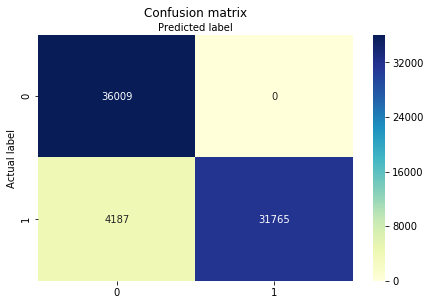

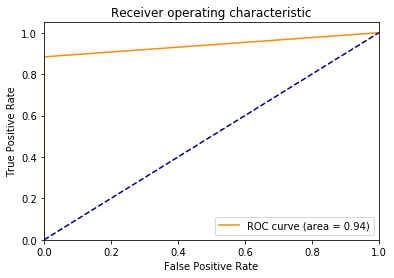

ROC-AUC-Score: 0.9417695816644415


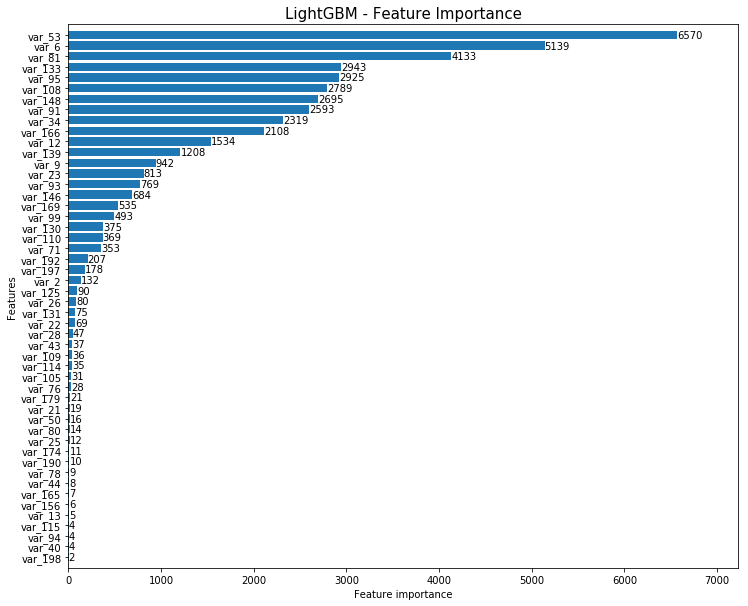

In [27]:
#predicting on test set
model = run_lgbm(X_resampled, y_resampled)


val_y_pred=model.predict(val_X)
val_y_pred[0:5]  # showing first 5 predictions
val_y_pred = np.where(val_y_pred > 0.5, 1, 0)

#Metrics
get_metrics(val_y,val_y_pred)
plot_roc_curve(val_y,val_y_pred)
get_auc_score(val_y ,val_y_pred)


fig, ax = plt.subplots(figsize=(12,10))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

Test Predictions

In [28]:
out_df = pd.DataFrame({"ID_code":test["ID_code"].values})

print("Predicting on test data")
predictions = model.predict(test[features])

out_df['target'] = predictions
out_df.to_csv("submission.csv", index=False)
print("Submitted")

Predicting on test data
Submitted
